## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

Medium:https://cle732.medium.com/airline-satisfaction-beginner-machine-learning-3dcbc79acf60

Github:https://github.com/ChrisHLe/FinalProject

#**Airline Satisfaction**
This dataset consists of columns with various datapoints collected from airline passengers and the final column indicates whether the passenger was satisfied or neutral/dissatisfied the dataset came from Kaggle located [here.](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=test.csv)

In this project I will be exploring the data and using these factors from the column to identify which factors affect a passengers satisfaction.



In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
uploaded = files.upload()
initialtrain = pd.read_csv('train.csv')
initialtest = pd.read_csv('test.csv')

Saving test.csv to test.csv
Saving train.csv to train.csv


#**Data Processing**



In [ ]:
print(initialtest.info())
print(initialtrain.info())
#the data was already split into training and testing so I will be merging them and splitting 
#again later which will provide a different testing set from the original


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
#Merging the sets
df = pd.concat([initialtest,initialtrain])
# I'll be dropping the unamed:0 column, id column, and index column which has been renamed because those factors are irrelevant to the satisfaction
df.index.name='i'
# the index must be reset because the files were merged making the index incorrect
df=df.reset_index()
df=df.drop(['i', 'Unnamed: 0','id'], axis = 1)
df


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
print(df.head())
print(df.info())
print(df.isnull().sum())
# there is some missing data in the arrival delay in minutes column so we will have to deal with that

   Gender      Customer Type  ...  Arrival Delay in Minutes             satisfaction
0  Female     Loyal Customer  ...                      44.0                satisfied
1  Female     Loyal Customer  ...                       0.0                satisfied
2    Male  disloyal Customer  ...                       0.0  neutral or dissatisfied
3    Male     Loyal Customer  ...                       6.0                satisfied
4  Female     Loyal Customer  ...                      20.0                satisfied

[5 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel            

#**Missing Values**

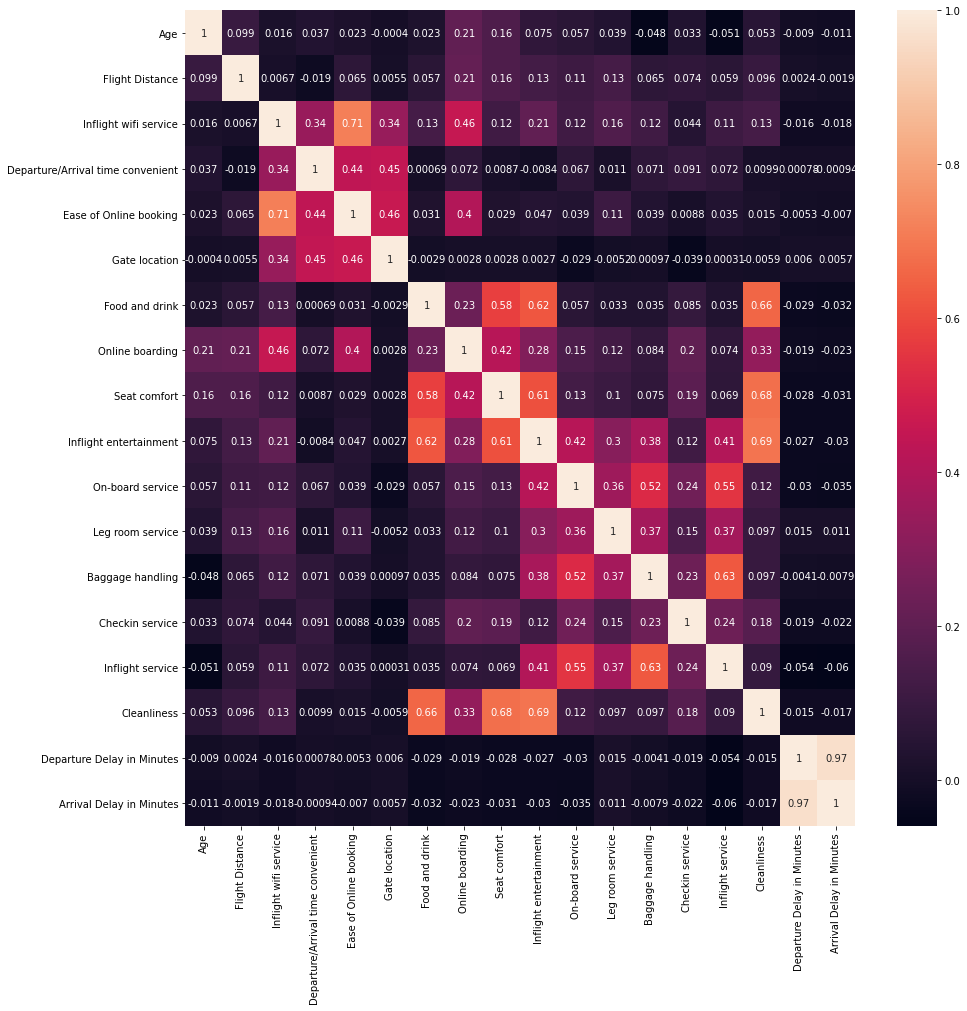

In [ ]:
#in order to fill in the missing values a pairplot will be used to see if the arrival delay in minutes has a correlation
#with any other columns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

As we can see from the heatmap Arrival Departure Delay in Minutes is 97% correlated with Departure Delay in Minutes so I will be filling in the missing values for Arrival with Departure as a rough estimate.

In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace = True)

In [ ]:
print(df.isnull().sum())
# the missing value has been estimated

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


The missing values have been addressed


#**EDA**
Now I'll be exploring some of the columns within this dataset

count                      129880
unique                          2
top       neutral or dissatisfied
freq                        73452
Name: satisfaction, dtype: object


Text(0.5, 1.0, 'Countplot for Satisfaction')

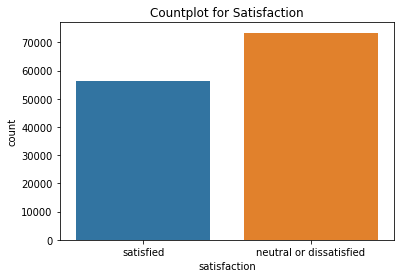

In [ ]:
# creating a counplot for the target variable which is satisfaction
print(df['satisfaction'].describe())
sns.countplot(x='satisfaction',data=df)
plt.title('Countplot for Satisfaction')
# as we can see here the data is not heavily skewed towards one side 

In [ ]:
df['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

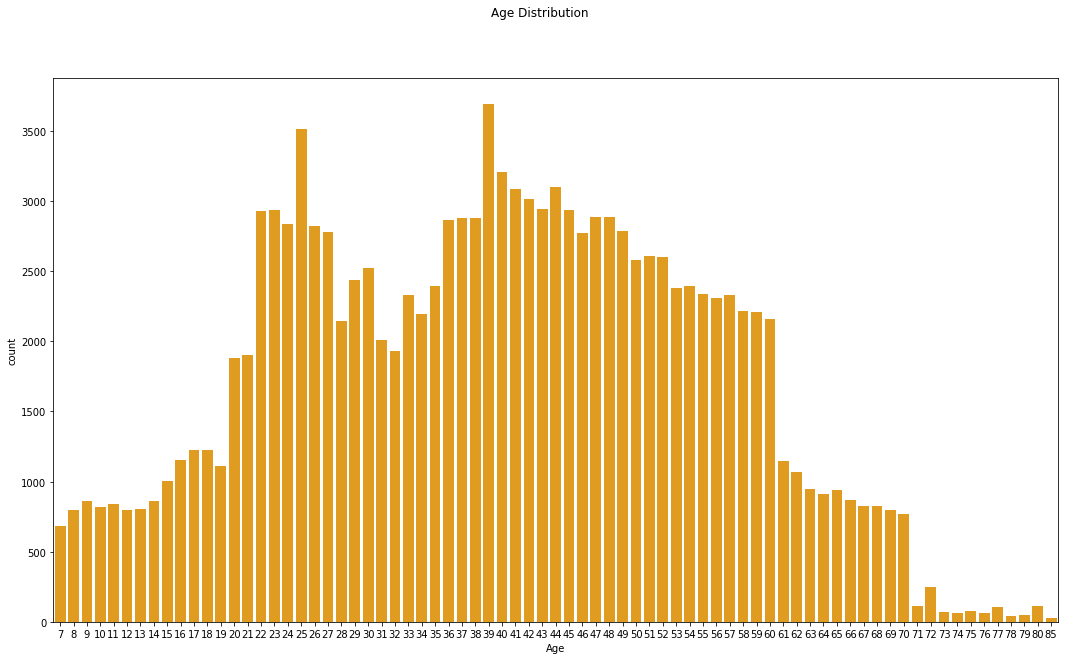

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
fig.suptitle('Age Distribution')
sns.countplot(x='Age',data = df,color='Orange')

Looking at the age there is an extremely large range across the dataset and I wanted to see if there were any outliers.

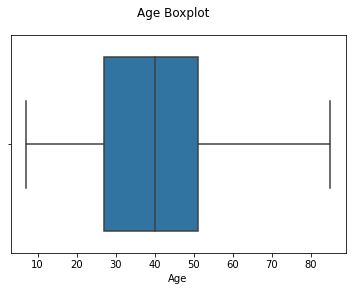

In [ ]:
fig, ax = plt.subplots()
fig.suptitle('Age Boxplot')
sns.boxplot(x='Age',data=df)

# based on this boxplot there were no outliers

Now that no outliers have been detected I wanted to see the relationship between age and the target variable (Satisfaction)

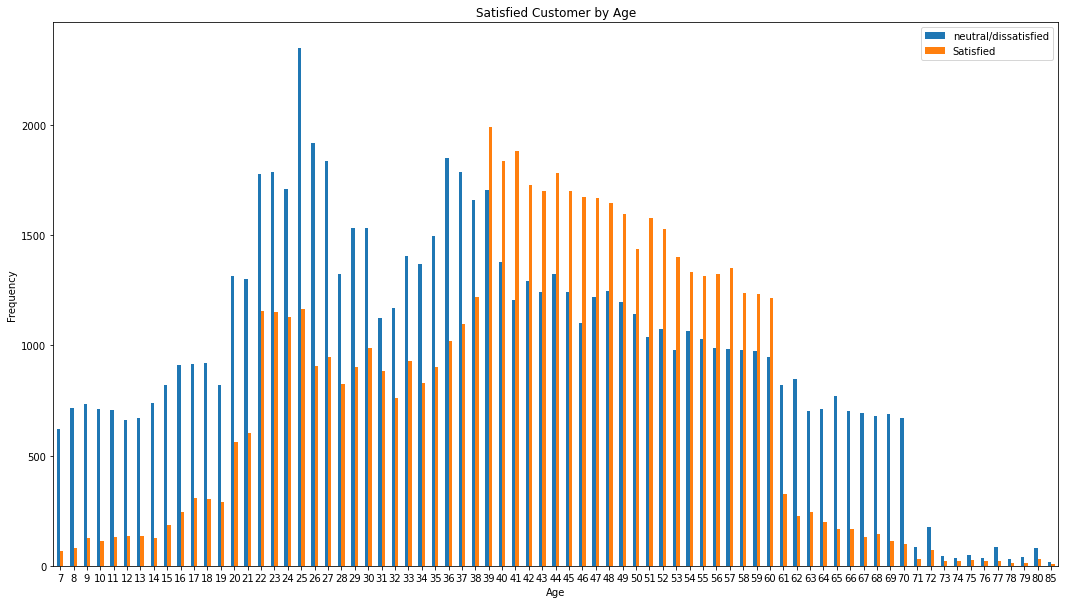

In [ ]:
pd.crosstab(df.Age,df.satisfaction).plot(kind="bar",figsize=(18,10))
plt.title('Satisfied Customer by Age')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()


After seeing the large distribution in age I wanted to see if certain ages were more likely to be satisfied than others. What I found was interesting, the age range from 39-60 all had more satisfied customers than dissatisfied.I expected some sprinkled throughout the ages rather than concentrated in a certain age group. Next I want to explore a crosstab between loyalty and satisfaction

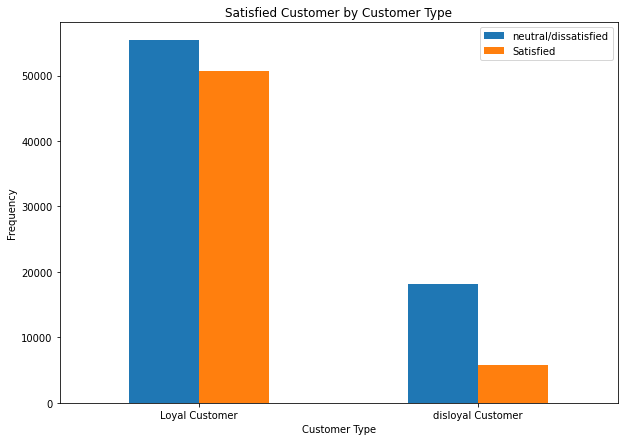

In [ ]:
pd.crosstab(df['Customer Type'],df.satisfaction).plot(kind="bar",figsize=(10,7))
plt.title('Satisfied Customer by Customer Type')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()

It seems here that for disloyal customers they have a larger amount of dissatisied passengers however there are still more neutral/dissatisfied passengers amongst loyal customers as well. Now that we've looked at the data a little bit we can start to create our models.

#**Models**
Since the target variable is binary (satisfied or neutral/dissatisfied) I'll be using some binary classifiers. First I'll encode the string variables to numeric

---



In [ ]:
#df.info()
# the columns gender,customer type, type of travel, class and satisfaction need to be encoded
df['Gender'] = df['Gender'].replace({"Male": 0, "Female": 1})
df['Customer Type'] = df['Customer Type'].replace({"disloyal Customer": 0, "Loyal Customer": 1})
df['Type of Travel'] =df['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1})
df['Class'] = df['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2})
df['satisfaction'] = df['satisfaction'].replace({"neutral or dissatisfied": 0, "satisfied": 1})

In [ ]:
dfcopy=df.drop(['Age', 'Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'], axis = 1)
dfcopy

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,1,1,0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,1
1,1,1,1,2,1,1,3,1,5,4,5,4,4,4,4,3,4,5,1
2,0,0,1,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0
3,0,1,1,2,0,0,0,2,3,4,4,1,1,1,1,3,1,4,1
4,1,1,1,0,2,3,4,3,4,1,2,2,2,2,2,4,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,0,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0
129876,0,1,1,2,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1
129877,0,0,1,2,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0
129878,1,0,1,0,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


In [ ]:
#scaling some columns
from sklearn.preprocessing import StandardScaler 
Standard_scaler = StandardScaler()
dfs = df.loc[:,['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
Standard_scaler.fit(dfs)
df2 = pd.DataFrame(Standard_scaler.transform(dfs), columns=dfs.columns)
df2

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.831523,-1.032952,0.926855,0.747158
1,-0.226727,1.676962,-0.386481,-0.392754
2,-1.284977,-1.000870,-0.386481,-0.392754
3,0.302398,2.192277,-0.386481,-0.237312
4,0.633101,-0.008338,-0.386481,0.125388
...,...,...,...,...
129875,-1.086555,-1.000870,-0.307681,-0.392754
129876,0.633101,1.159642,-0.386481,-0.392754
129877,-0.623571,0.806742,-0.202614,-0.030055
129878,-1.152696,-0.190803,-0.386481,-0.392754


In [ ]:
df=pd.concat([df2,dfcopy],axis=1)
df
# now that the data has been encoded we can move create the training and testing set

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0.831523,-1.032952,0.926855,0.747158,1,1,1,0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,1
1,-0.226727,1.676962,-0.386481,-0.392754,1,1,1,2,1,1,3,1,5,4,5,4,4,4,4,3,4,5,1
2,-1.284977,-1.000870,-0.386481,-0.392754,0,0,1,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0
3,0.302398,2.192277,-0.386481,-0.237312,0,1,1,2,0,0,0,2,3,4,4,1,1,1,1,3,1,4,1
4,0.633101,-0.008338,-0.386481,0.125388,1,1,1,0,2,3,4,3,4,1,2,2,2,2,2,4,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,-1.086555,-1.000870,-0.307681,-0.392754,1,0,1,0,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0
129876,0.633101,1.159642,-0.386481,-0.392754,0,1,1,2,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1
129877,-0.623571,0.806742,-0.202614,-0.030055,0,0,1,2,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0
129878,-1.152696,-0.190803,-0.386481,-0.392754,1,0,1,0,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(['satisfaction'],axis=1)
y=df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape

((90916, 22), (38964, 22))

#**Dummy Classifier**

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print('Baseline Accuracy:',baseline_acc)

Baseline Accuracy: 0.5655990144748999


#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
logRegpredict = logReg.predict(X_test)
lracc=accuracy_score(y_test,logRegpredict)
print('Accuracy:',lracc)

Accuracy: 0.8757571091263731


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#**XGBoost**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X,label=y)
params1 = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }  
xg =XGBClassifier(**params1)
xg.fit(X_train,y_train)
xgbpredict = xg.predict(X_test)
xgbacc=accuracy_score(y_test,xgbpredict)
print('Accuracy:',xgbacc)


Accuracy: 0.959372754337337


#**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB() 
nb.fit(X_train, y_train)
nbpredict = nb.predict(X_test)
nbacc=accuracy_score(y_test,nbpredict)
print('Accuracy:',nbacc)

Accuracy: 0.8669797762036752


#**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, y_train)
knnpredict=knn.predict(X_test)
knnacc=accuracy_score(y_test,knnpredict)
print('Accuracy:',knnacc)

Accuracy: 0.9276511651781131


In [ ]:
from sklearn import metrics

print("Confusion Matrix: Logistic Regression Classifier:")
print(metrics.confusion_matrix(y_test,logRegpredict))

print("Confusion Matrix on XGBoost:")
print(metrics.confusion_matrix(y_test,xgbpredict))

print("Confusion Matrix on Naive Bayes:")
print(metrics.confusion_matrix(y_test,nbpredict))

print("Confusion Matrix on KNN:")
print(metrics.confusion_matrix(y_test,knnpredict))


Confusion Matrix: Logistic Regression Classifier:
[[19947  2091]
 [ 2750 14176]]
Confusion Matrix on XGBoost:
[[21350   688]
 [  895 16031]]
Confusion Matrix on Naive Bayes:
[[19829  2209]
 [ 2974 13952]]
Confusion Matrix on KNN:
[[20934  1104]
 [ 1715 15211]]


#**Best Model and Tuning**
It seems that xgb boost has the highest accuracy of the models that I have tested so I will fine tune the paramters as well as display more about the model

In [ ]:
from sklearn import metrics

cf = metrics.confusion_matrix(y_test, xgbpredict)
print(cf)

print('Accuracy =', metrics.accuracy_score(y_test, xgbpredict))




[[21350   688]
 [  895 16031]]
Accuracy = 0.959372754337337


In [ ]:
from xgboost import cv
from sklearn.model_selection import RandomizedSearchCV
params = {'colsample_bytree': [0.3,0.4,0.5,0.7],
          'learning_rate': [0.05,.10,0.15,0.2,0.25,0.3],
          'max_depth': [3,4,5,6,8,10,12] ,
          'min_child_weight': [1,3,5,7],
          'gamma':[0.0,0.1,0.2,0.3,0.4]
          }


In [ ]:
import xgboost
classifier=xgboost.XGBClassifier(objective ='binary:logistic')

In [ ]:
random_search=RandomizedSearchCV(estimator=classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.25,
 'max_depth': 10,
 'min_child_weight': 3}

In [ ]:
#compare base and tuned parameters
xgbase =XGBClassifier(**params1)
xgbase.fit(X_train,y_train)
xgbasepredict = xg.predict(X_test)
xgbaseacc=accuracy_score(y_test,xgbasepredict)
print('Accuracy:',xgbaseacc)

xgtune = xgb.XGBClassifier(objective ='binary:logistic', learning_rate=0.25, max_depth=10, colsample_bytree=0.4, gamma=0.2,min_child_weight=3)
xgtune.fit(X_train,y_train)
xgtunepredict = xgtune.predict(X_test)
xgtuneacc=accuracy_score(y_test,xgtunepredict)                              
print('Accuracy:',xgtuneacc)


Accuracy: 0.959372754337337
Accuracy: 0.9612719433323067


After finding the optimal parameters, the accuracy slightly improved to 96.1%

In [ ]:
feature_importances = xgtune.feature_importances_
print(feature_importances)
features = X_train.columns
xgdf = pd.DataFrame({'features': features, 'importance': feature_importances})
xgdf = xgdf.sort_values(by='importance', ascending=False)
print(xgdf.iloc[0:3, :])


[0.00701748 0.00340936 0.0017951  0.00237903 0.00191517 0.15535621
 0.3935136  0.09602854 0.15852378 0.00592828 0.02708152 0.00437381
 0.00281836 0.0249159  0.01769396 0.03367089 0.01348609 0.00898341
 0.0090372  0.01174424 0.00541923 0.01490896]
                features  importance
6         Type of Travel    0.393514
8  Inflight wifi service    0.158524
5          Customer Type    0.155356


After tuning the final model I decided to look at which features were the most important and have concluded on these three mentioned above. In order to improve this model in the future, these features can be weighted more heavily.